<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8632\895045013.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.


[nltk_data] Downloading package punkt to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8632\895045013.py:39: MarkupResemblesLocatorWarning: The input lo

NLTK data downloaded.
Data preprocessing done.


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 147ms/step - accuracy: 0.6702 - loss: 0.6104 - val_accuracy: 0.6821 - val_loss: 0.6079
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.8389 - loss: 0.3685 - val_accuracy: 0.8053 - val_loss: 0.4236
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 141ms/step - accuracy: 0.8816 - loss: 0.2848 - val_accuracy: 0.8108 - val_loss: 0.4142
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 291ms/step - accuracy: 0.8909 - loss: 0.2669 - val_accuracy: 0.8315 - val_loss: 0.3701
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 275ms/step - accuracy: 0.9005 - loss: 0.2488 - val_accuracy: 0.8227 - val_loss: 0.3922
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.7656 - loss: 0.5210 - val_accuracy: 0.6879 - val_loss: 0.6023
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 283ms/step - accuracy: 0.8429 - loss: 0.3601 - val_accuracy: 0.7549 - val_loss: 0.4865
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 84s

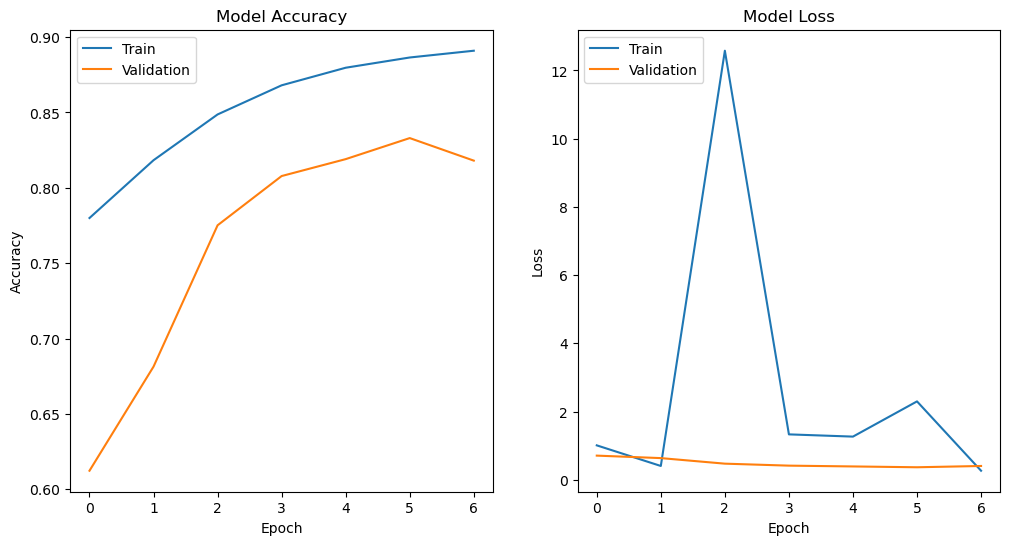

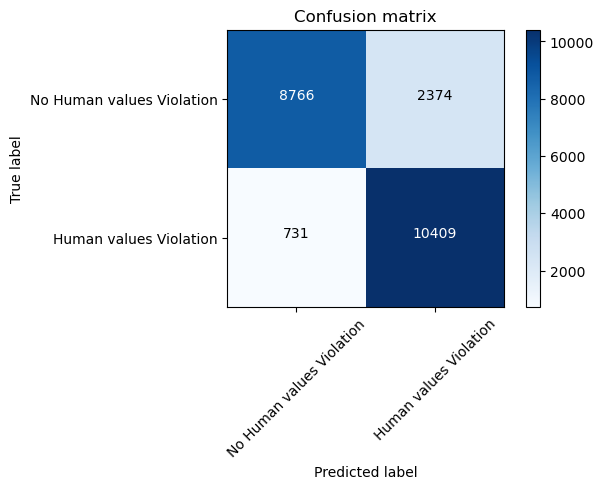

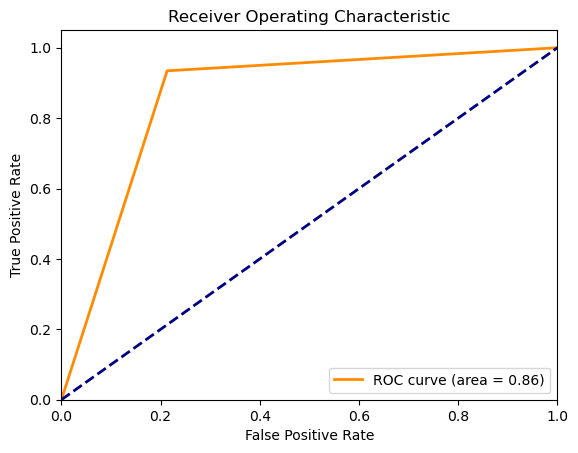

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     11140
           1       0.81      0.93      0.87     11140

    accuracy                           0.86     22280
   macro avg       0.87      0.86      0.86     22280
weighted avg       0.87      0.86      0.86     22280



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, GRU, Bidirectional, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

print("Data preprocessing done.")

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the bidirectional GRU classifier
def bidirectionalGRUclassifier():
    sequence_input = Input(shape=[max_len], name='inputs')
    model = Embedding(max_words, 100, input_length=max_len)(sequence_input)
    model = SpatialDropout1D(0.5)(model)
    model = Bidirectional(GRU(8, return_sequences=True, dropout=0.5, recurrent_dropout=0.1))(model)
    model = Conv1D(8, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(model)
    avg_pool = GlobalAveragePooling1D()(model)
    max_pool = GlobalMaxPooling1D()(model)
    model = concatenate([avg_pool, max_pool]) 
    preds = Dense(1, activation="sigmoid")(model)
    return Model(inputs=sequence_input, outputs=preds)

# Instantiate the model
bidirectionalGRU_model = bidirectionalGRUclassifier()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        bidirectionalGRU_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        history = bidirectionalGRU_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = bidirectionalGRU_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Human values Violation", "Human values Violation"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))


Dataset loaded.

<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8632\2631471598.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Downloading package punkt to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[n


NLTK data downloaded.
Data preprocessing done.


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.6164 - loss: 0.6458 - val_accuracy: 0.5265 - val_loss: 0.7394
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.7466 - loss: 0.5206 - val_accuracy: 0.6850 - val_loss: 0.5890
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.8295 - loss: 0.3715 - val_accuracy: 0.7350 - val_loss: 0.5156
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.8636 - loss: 0.3152 - val_accuracy: 0.7814 - val_loss: 0.4550
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.8809 - loss: 0.2826 - val_accuracy: 0.8115 - val_loss: 0.4181
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.8881 - loss: 0.2688 - val_accuracy: 0.7736 - val_loss: 0.4934
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - accuracy: 0.7559 - loss: 0.5247 - val_accuracy: 0.7229 - val_loss: 0.5561
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s

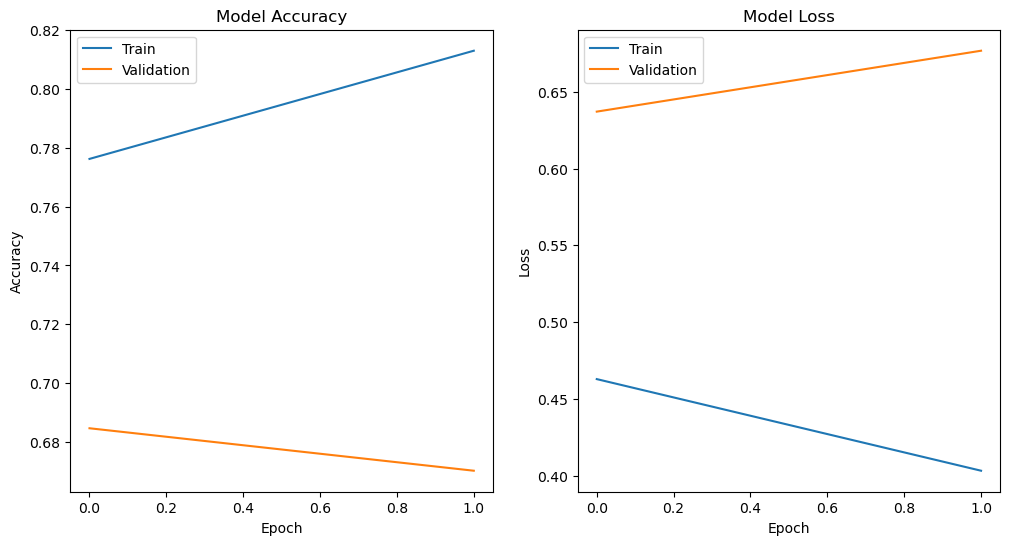

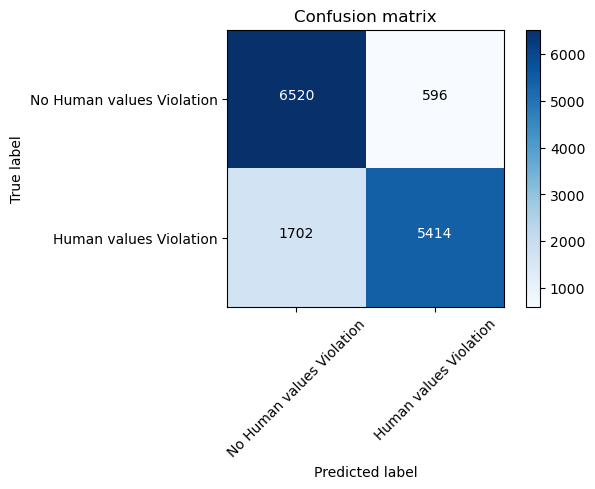

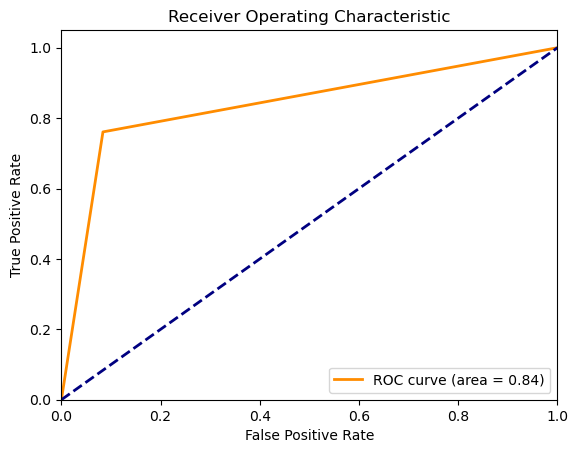

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      7116
           1       0.90      0.76      0.82      7116

    accuracy                           0.84     14232
   macro avg       0.85      0.84      0.84     14232
weighted avg       0.85      0.84      0.84     14232



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, GRU, Bidirectional, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

print("Data preprocessing done.")

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the bidirectional GRU classifier
def bidirectionalGRUclassifier():
    sequence_input = Input(shape=[max_len], name='inputs')
    model = Embedding(max_words, 100, input_length=max_len)(sequence_input)
    model = SpatialDropout1D(0.5)(model)
    model = Bidirectional(GRU(8, return_sequences=True, dropout=0.5, recurrent_dropout=0.1))(model)
    model = Conv1D(8, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(model)
    avg_pool = GlobalAveragePooling1D()(model)
    max_pool = GlobalMaxPooling1D()(model)
    model = concatenate([avg_pool, max_pool]) 
    preds = Dense(1, activation="sigmoid")(model)
    return Model(inputs=sequence_input, outputs=preds)

# Instantiate the model
bidirectionalGRU_model = bidirectionalGRUclassifier()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        bidirectionalGRU_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        history = bidirectionalGRU_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = bidirectionalGRU_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Human values Violation", "Human values Violation"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))
